# Enemy Survivability 

How long it takes for each weapon to kill an enemy.

## Setting Up

In [1]:
import math
import pandas as pd

%run weapon_full_data.ipynb

## Weapon Damages by Alien

In [2]:
weapon_damages_aliens = weapon_data_aliens.groupby(["weapon", "alien"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["turn_penetrating_damage_expected"]]
weapon_damages_aliens = weapon_damages_aliens.rename(columns={"turn_penetrating_damage_expected": "turn_damage"})
weapon_damages_aliens = weapon_damages_aliens.sort_values(by=["turn_damage"])

## Alien Damage Lists

### Average Damage

In [3]:
weapon_damages_average = weapon_damages_aliens.groupby(["weapon"]).mean()
weapon_damages_average = weapon_damages_average.sort_values(by=["turn_damage"])

In [4]:
weapon_damages_max = weapon_damages_aliens.groupby(["weapon"]).max()
weapon_damages_max = weapon_damages_max.sort_values(by=["turn_damage"])

In [5]:
average_damages_expected = weapon_damages_max.merge(weapon_damages_average, on="weapon")
average_damages_expected = average_damages_expected.rename(columns={"turn_damage_x": "max", "turn_damage_y": "average"})
average_damages_expected = average_damages_expected.sort_values(by=["average"])
average_damages_expected

,max,average
weapon,,
grenade,16.559512,11.583160
rifle,27.070312,14.079539
pistol,32.872690,15.823376
proximity_grenade,23.702330,18.165370
auto_cannon,33.220114,21.149033
alien_grenade,30.848340,24.891836
heavy_cannon,38.842398,26.552660
cannon_turret,41.809131,28.719011
rocket_launcher,40.976408,30.887485


Text(0, 0.5, 'Damage')

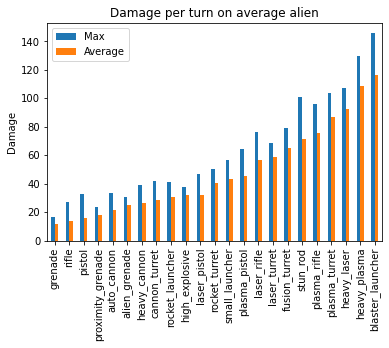

In [6]:
ax = average_damages_expected.plot.bar(title="Damage per turn on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Damage Per Time Unit

In [7]:
weapon_damages_per_tu_targets_average = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_average = weapon_damages_per_tu_targets_average.groupby(["weapon"]).mean()

In [8]:
weapon_damages_per_tu_targets_max = weapon_data_aliens[["weapon", "penetrating_damage_per_time_unit"]]
weapon_damages_per_tu_targets_max = weapon_damages_per_tu_targets_max.groupby(["weapon"]).max()

In [9]:
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_max.merge(weapon_damages_per_tu_targets_average, on="weapon")
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.rename(columns={"penetrating_damage_per_time_unit_x": "max", "penetrating_damage_per_time_unit_y": "average"})
weapon_damages_per_tu_targets_expected = weapon_damages_per_tu_targets_expected.sort_values(by=["average"])
weapon_damages_per_tu_targets_expected

,max,average
weapon,,
rifle,1.054688,0.370600
grenade,0.617604,0.432006
pistol,1.243623,0.478898
auto_cannon,1.824870,0.589868
proximity_grenade,0.884003,0.677496
heavy_cannon,2.433229,0.765343
cannon_turret,1.706321,0.827785
alien_grenade,1.150521,0.928367
plasma_pistol,1.610587,0.948574


Text(0, 0.5, 'Ratio')

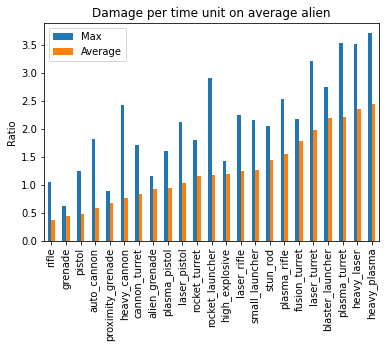

In [10]:
ax = weapon_damages_per_tu_targets_expected.plot.bar(title="Damage per time unit on average alien", legend=False)
ax.legend(["Max", "Average"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Ratio")

### Hits to Kill by Weapon

In [11]:
hits_to_kill_average = weapon_data_aliens[["weapon", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["weapon"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

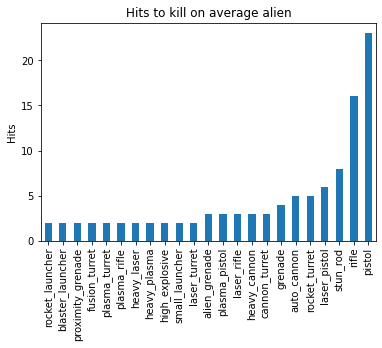

In [12]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Hits to Kill by Alien

In [13]:
hits_to_kill_average = weapon_data_aliens[["alien", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["alien"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

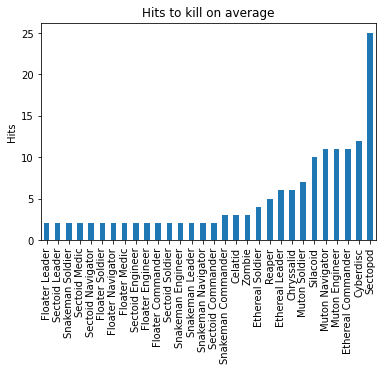

In [14]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Expected Kills in a Turn

In [15]:
expected_kills = weapon_data_aliens[["weapon", "turn_expected_kills"]]
expected_kills = expected_kills.groupby(["weapon"]).mean()
expected_kills["turn_expected_kills"] = expected_kills.apply(lambda x: math.ceil(x["turn_expected_kills"]), axis=1)
expected_kills = expected_kills.sort_values(by=["turn_expected_kills"])

Text(0, 0.5, 'Kills')

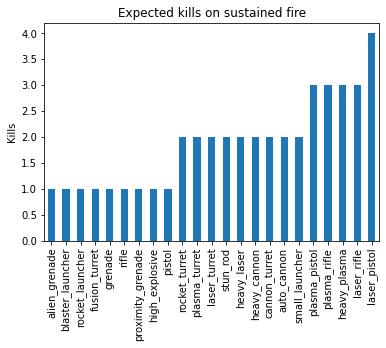

In [16]:
ax = expected_kills.plot.bar(title="Expected kills on sustained fire", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Kills")

### Armor

In [17]:
armor_average = weapon_data_aliens[["alien", "armor"]]
armor_average = armor_average.groupby(["alien"]).mean()
armor_average = armor_average.sort_values(by=["armor"])

Text(0, 0.5, 'Armor')

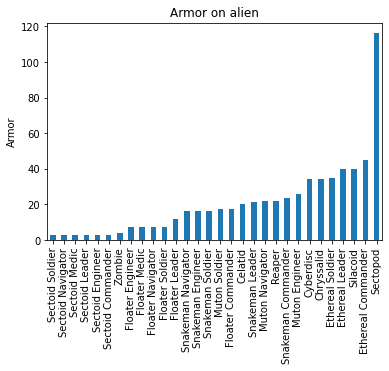

In [18]:
ax = armor_average.plot.bar(title="Armor on alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Armor")